<a href="https://colab.research.google.com/github/effection00/codestates/blob/main/section2/sprint1/n211a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [2]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [3]:
### 이곳에서 과제를 진행해 주세요 ###
import numpy as np
print(np.corrcoef(df['bedrooms'], df['price'])[0, 1])
print(np.corrcoef(df['bathrooms'], df['price'])[0, 1])
print(np.corrcoef(df['sqft_living'], df['price'])[0, 1])
print(np.corrcoef(df['sqft_lot'], df['price'])[0, 1])
print(np.corrcoef(df['floors'], df['price'])[0, 1])
print(np.corrcoef(df['waterfront'], df['price'])[0, 1])
print(np.corrcoef(df['view'], df['price'])[0, 1])
print(np.corrcoef(df['condition'], df['price'])[0, 1])
print(np.corrcoef(df['grade'], df['price'])[0, 1])
print(np.corrcoef(df['sqft_above'], df['price'])[0, 1])
print(np.corrcoef(df['yr_built'], df['price'])[0, 1])
print(np.corrcoef(df['yr_renovated'], df['price'])[0, 1])
print(np.corrcoef(df['zipcode'], df['price'])[0, 1])
print(np.corrcoef(df['lat'], df['price'])[0, 1])
print(np.corrcoef(df['long'], df['price'])[0, 1])
print(np.corrcoef(df['sqft_living15'], df['price'])[0, 1])
print(np.corrcoef(df['sqft_lot15'], df['price'])[0, 1])


# sqft_living이 가장 상관관계 높음

0.308349598145638
0.5251375054139619
0.7020350546118002
0.08966086058710017
0.25679388755071847
0.26636943403060226
0.39729348829450495
0.03636178912899747
0.6674342560202365
0.6055672983560781
0.05401153149479268
0.12643379344089314
-0.05320285429832562
0.3070034799952186
0.02162624103930587
0.5853789035795679
0.08244715251948598


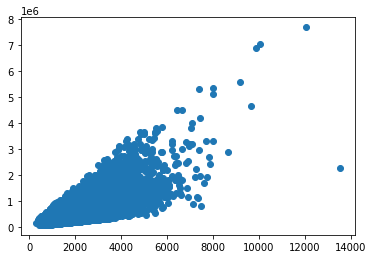

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['sqft_living'], df['price']);

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

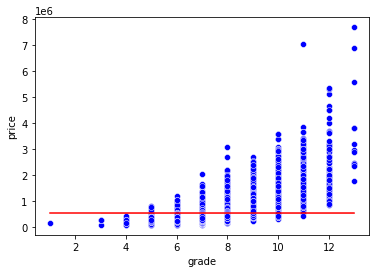

In [5]:
import seaborn as sns

#기준모델
x = df['grade']
y = df['price']

predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()


# 산점도
sns.scatterplot(x=x,y=y,color='blue')
#기준모델
sns.lineplot(x=x, y=predict, color='red')

In [6]:
predict

540088.1417665294

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [7]:
### 이곳에서 과제를 진행해 주세요 ###


#선형회귀모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()
#2차원 배열로 넣기
X_train = df[['grade']]
y_train = df['price']

In [8]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
X_test = [[6]]
y_pred = model.predict(X_test)

y_pred

#예측 가격 : 194700.3977405

array([194700.3977405])

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [10]:
### 이곳에서 과제를 진행해 주세요 ###
def explain_predict(grade):
  y_pred = model.predict([[grade]])
  pred = f"{int(grade)} grade 주택 가격 예측 : ${int(y_pred)} (1 grade당 추가금 : ${int(model.coef_[0])})"
  return pred
explain_predict(6)

'6 grade 주택 가격 예측 : $194700 (1 grade당 추가금 : $208457)'

In [24]:
# grade 특성 회귀계수
int(model.coef_[0])

208457

### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [22]:
### 이곳에서 과제를 진행해 주세요 ###

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(df[['sqft_living']],df['price'])

print("회귀계수 비교 grade :",int(model.coef_[0])," sqft_living :",int(model2.coef_[0]))
print("절편 비교  grade :", int(model.intercept_)," sqft_living :",int(model2.intercept_))
# sqft_living 회귀계수 : 280.62356789744825

회귀계수 비교 grade : 208457  sqft_living : 280
절편 비교  grade : -1056044  sqft_living : -43580


## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [13]:
### 이곳에서 과제를 진행해 주세요 ###

# 6) 
선형회귀 분석의 가정
1. 선형성  : 입력변수(x)와 출력변수(y)의 관계가 선형이다 
2. 독립성 : 입력변수와 오차는 관련이 없어야 한다
3. 등분산성 : 오차의 분산이 고루 분포되어야 한다(산점도 활용 시 입력변수와 잔차 간의 아무런 연관성이 없이 고루 분포되어야 한다)
4. 정규성 : 오차의 분포가 정규분포를 따른다
5. 비상관성 : 오차들끼리 상관이 없다


# 7)
OLS(최소제곱법)
- 예측치와 관찰치의 차이인 잔차들의 제곱의 합이 최소가 되도록 회기식의 해를 추청하는 방법
- 어떤 데이터가 주어졌을 때 최적의 추세선을 그리기 위한 방법
- 관찰이나 실험으로 얻은 작은 데이터를 분석해 상황을 설명하는 최적의 방정식을 예측하는 방법 

